In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv',
                index_col = 'date',
                parse_dates = ['date'])

In [3]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [4]:
df = df[(df['value'] < df['value'].quantile(0.975)) & (df['value'] > df['value'].quantile(0.025))]

In [5]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


* Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

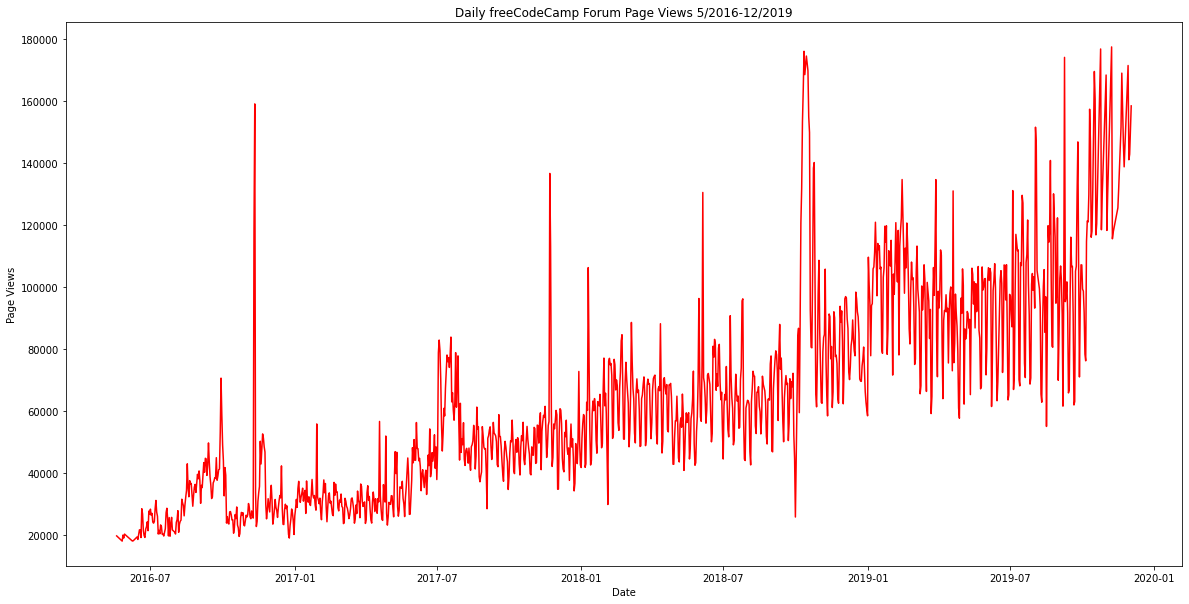

In [6]:
def draw_line_plot():
    fig = plt.figure(figsize=(20,10))
    plt.plot(df, color = 'r')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    
draw_line_plot()

* Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [7]:
df_bar = df.copy()

In [8]:
df_bar['year'] = df_bar['date'].dt.year

KeyError: 'date'

In [89]:
df_bar['month'] = df_bar['date'].dt.month_name()


KeyError: 'date'

In [67]:
df_bar.ma

date     2019-12-03 00:00:00
value                 177588
year                    2019
month              September
dtype: object

axes = df_bar_grouped.plot.bar(figsize=(14,5))
axes.set_xlabel("Years")
axes.set_ylabel("Average Page Views")
# import datetime for the below line
axes.legend(labels = [datetime.datetime.strptime(str(d), "%m").strftime("%B") for d in sorted(df_bar.index.month.unique())])
fig = axes.get_figure()
fig.savefig('bar_plot.png')
return fig
[/spoiler]

In [78]:
def draw_bar_plot():
    df_bar = df.copy() 
    df_bar['year'] = df_bar['date'].dt.year
    df_bar['month'] = df_bar['date'].dt.month_name()
    
    x = sorted(df_bar1.index)
    y = [1,2,3,4]
    sns.barplot(x, y)

draw_bar_plot()

KeyError: 'date'

In [40]:
df_bar_group = df_bar.groupby(['year','month'])['value'].mean().unstack()
df_bar_group

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2016,NaN,31049.193548,27832.419355,NaN,NaN,24109.678571,21875.105263,NaN,19432.400000,40448.633333,27398.322581,41476.866667
2017,30878.733333,47712.451613,48420.580645,31113.071429,32785.161290,65806.838710,43577.500000,29369.096774,34244.290323,57701.566667,47438.709677,47376.800000
2018,62350.833333,62831.612903,80047.483871,65679.000000,58580.096774,63591.064516,70117.000000,62693.774194,56562.870968,78688.333333,111378.142857,65941.733333
2019,89368.433333,102717.310345,150733.500000,105968.357143,102056.516129,97236.566667,90435.642857,91214.483871,91439.903226,143166.428571,122802.272727,97268.833333


In [35]:
months = ['January', 'February', 'March','April', 'May','June','July', 'August','September', 'October', 'November', 'December']
months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [36]:
df_bar_group = df_bar.groupby(['year','month'])['value'].mean().unstack()
(sorted(df_bar1.index))

[2016, 2017, 2018, 2019]

In [25]:
df_bar

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,November
1234,2019-11-29,171584,2019,November
1235,2019-11-30,141161,2019,November
1236,2019-12-01,142918,2019,December


AttributeError: module 'seaborn' has no attribute 'bar'